In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
import pickle, datetime
import Preprocess as pp
import helper as hp

import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, Convolution2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras.backend as K
import tensorflow as tf

import  PIL.Image

Using TensorFlow backend.


### Loading a test Image

In [2]:
filename = './Datasets/101_ObjectCategories/airplanes/image_0001.jpg'
HEIGHT, WIDTH = 227, 227

img = load_img(filename)
img = img.resize((HEIGHT,WIDTH))

x_test = np.empty((1, HEIGHT, WIDTH, 3), np.float32)
x_test[0,:,:,:] = img

### Loading Model 

In [3]:
model = keras.models.load_model('./Datasets/Models/alexnet/alexNet_cifar100.h5')

### Visualizing results of convolution layers

In [4]:
# Get weight of first convolution layer
wts = model.layers[1].get_weights()
print(wts[0].shape)

(11, 11, 3, 96)


In [5]:
inp = tf.constant(x_test)
ftr = tf.constant(wts[0])
b = tf.constant(wts[1])
c = tf.nn.conv2d(inp, ftr, strides = [1,4,4,1], padding='VALID')
c = c + b
sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 55, 55, 96)


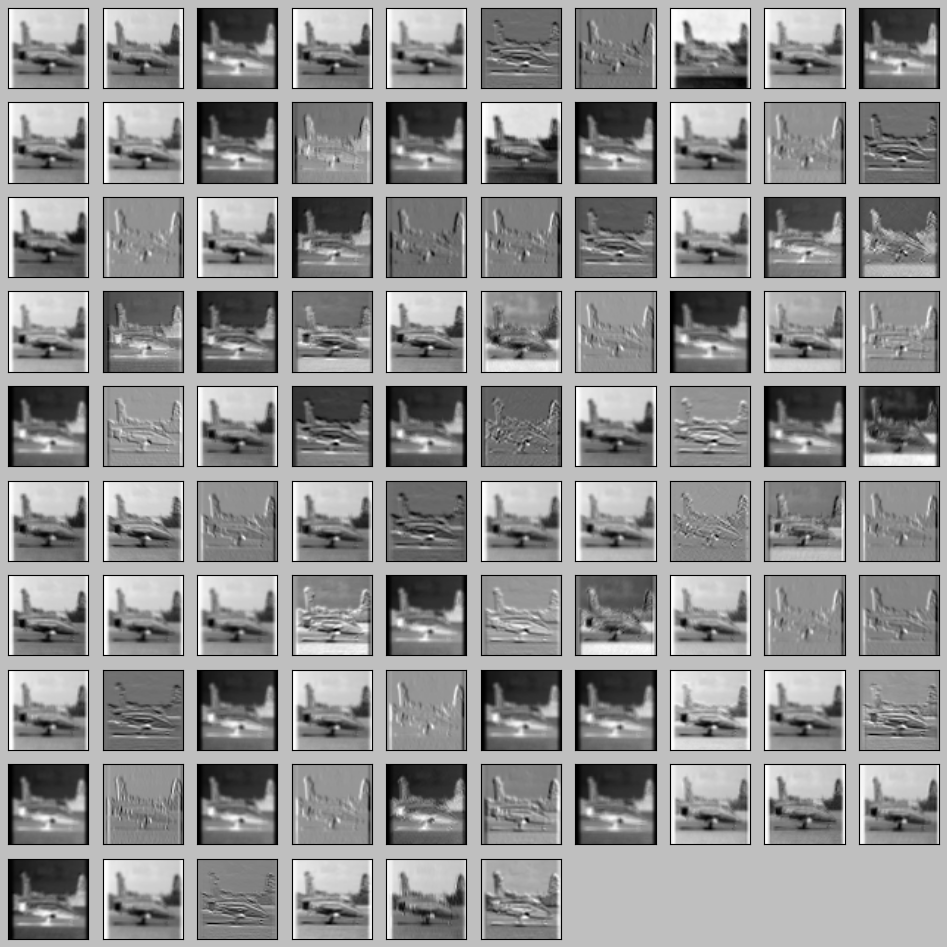

In [6]:
plt.style.use('classic')

fig=plt.figure(figsize=(12,12))

for i in range(96):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [7]:
# Max Pooling Layer(1)
inp = tf.constant(res)
c = tf.nn.max_pool(res, ksize = [1,3,3,1], strides = [1,2,2,1], padding="VALID") 

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 27, 27, 96)


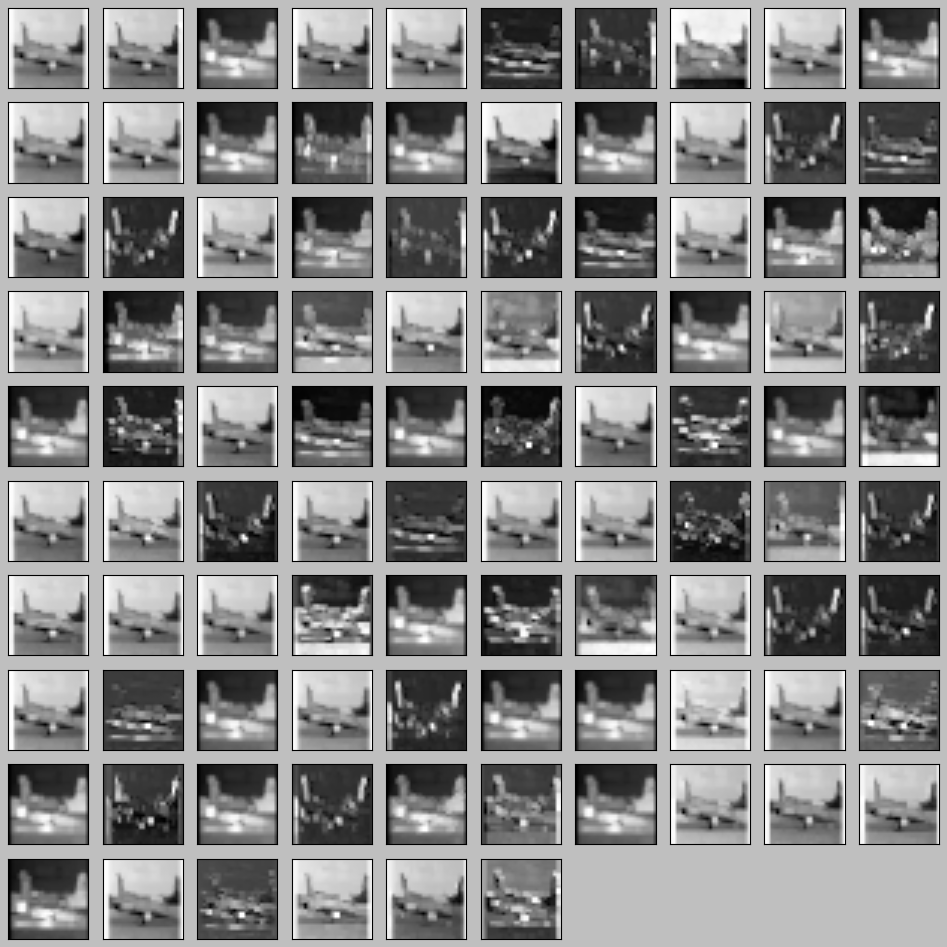

In [8]:
fig=plt.figure(figsize=(12,12))

for i in range(96):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [9]:
wts = model.layers[3].get_weights()

In [10]:
# Batch Normalization Layer(1)
inp = tf.constant(res)
c = tf.nn.batch_normalization(res, mean=wts[2], variance=wts[3], 
                              offset=wts[1], scale=wts[0], variance_epsilon = 1e-2) 

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 27, 27, 96)


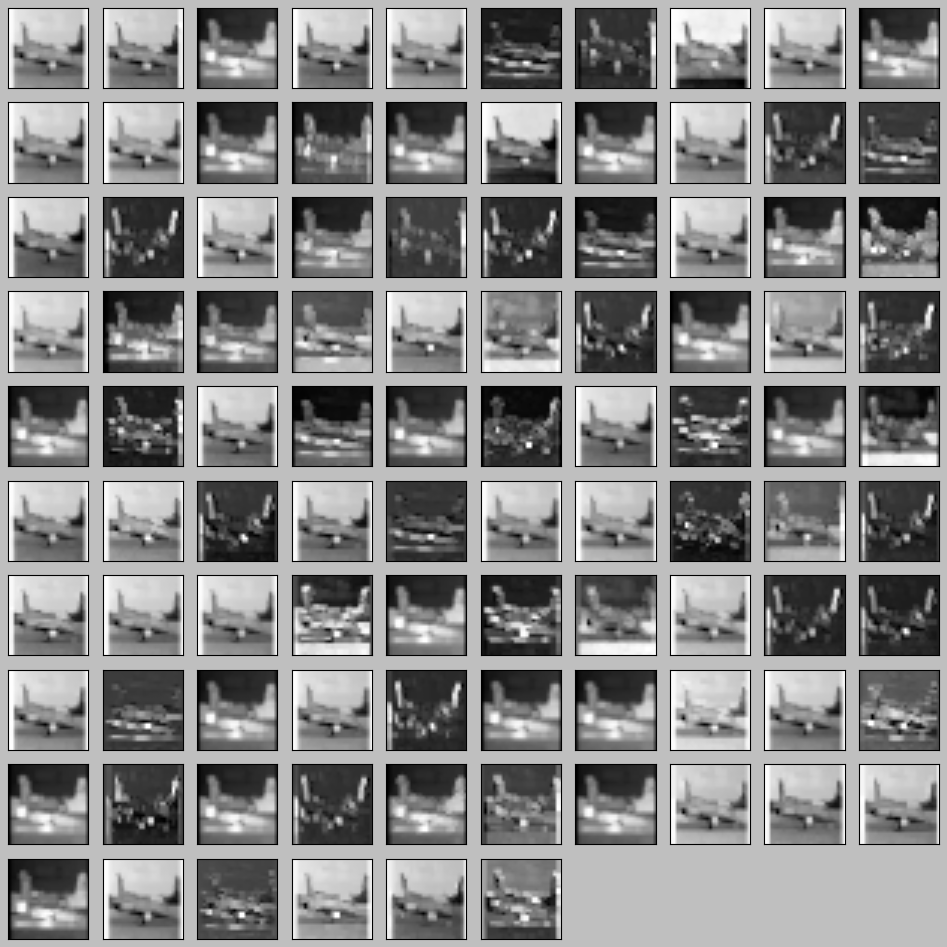

In [11]:
fig=plt.figure(figsize=(12,12))

for i in range(96):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

#### 2nd Convolution Layer

In [12]:
print(model.layers[5])
wts = model.layers[5].get_weights()
wts[0].shape

(5, 5, 96, 256)

In [13]:
inp = tf.constant(res)
ftr = tf.constant(wts[0])
b = tf.constant(wts[1])
c = tf.pad(inp, paddings = [[0,0],[2,2],[2,2],[0,0]], mode='CONSTANT') 
c = tf.nn.conv2d(c, ftr, strides = [1,1,1,1], padding='VALID')
c = c + b

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 27, 27, 256)


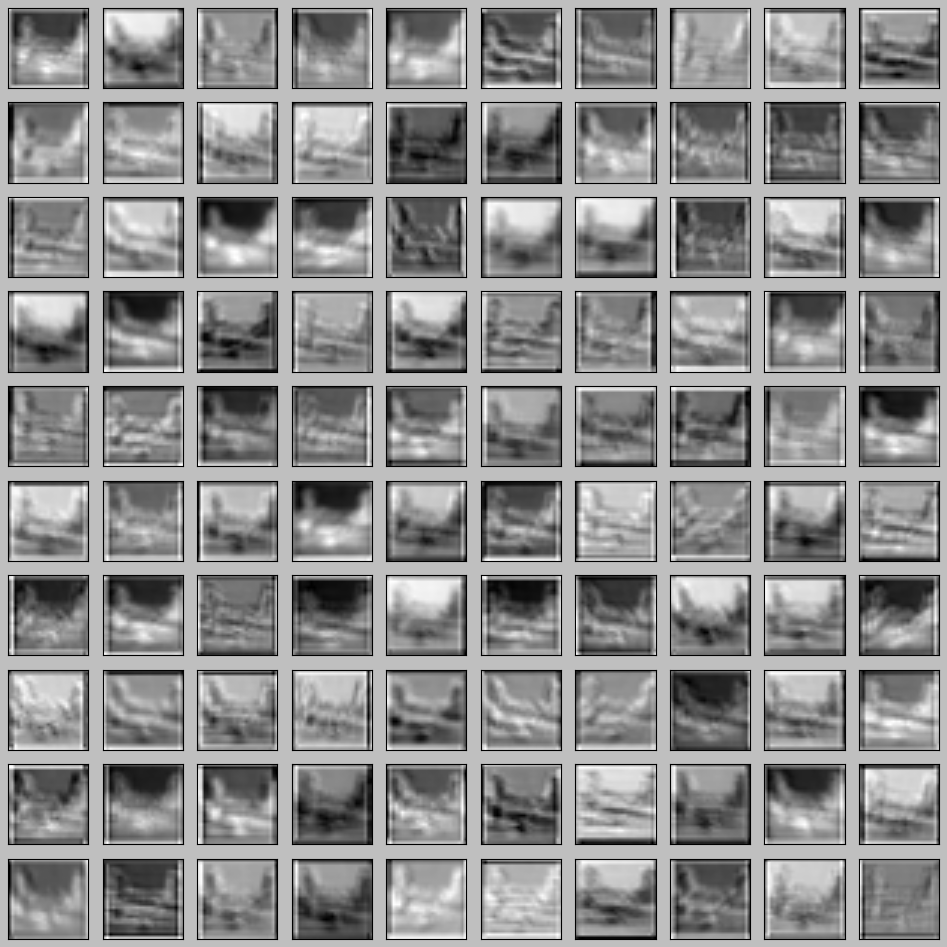

In [158]:
fig=plt.figure(figsize=(12,12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [183]:
# Max Pooling Layer(2)
inp = tf.constant(res)
c = tf.nn.max_pool(res, ksize = [1,3,3,1], strides = [1,2,2,1], padding="VALID") 

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 13, 13, 256)


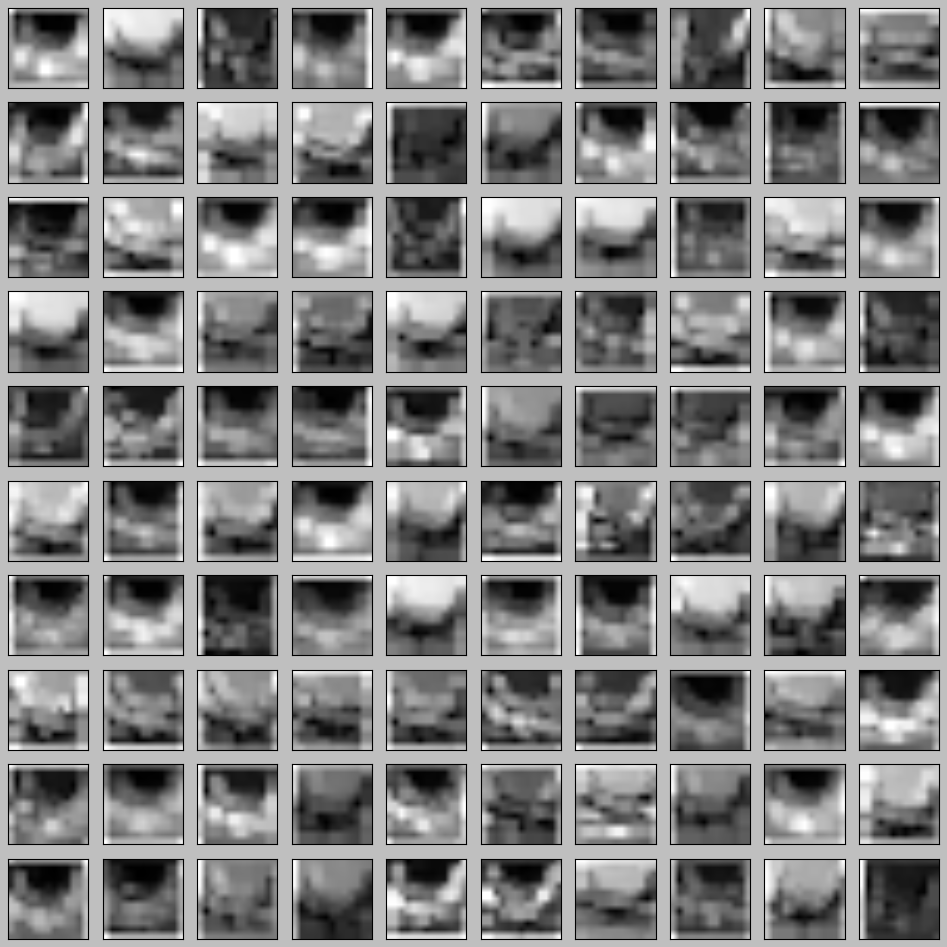

In [160]:
fig=plt.figure(figsize=(12,12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [184]:
print(model.layers[7])
wts = model.layers[7].get_weights()

In [185]:
# Batch Normalization Layer(1)
inp = tf.constant(res)
c = tf.nn.batch_normalization(res, mean=wts[2], variance=wts[3], 
                              offset=wts[1], scale=wts[0], variance_epsilon = 1e-2) 

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 13, 13, 256)


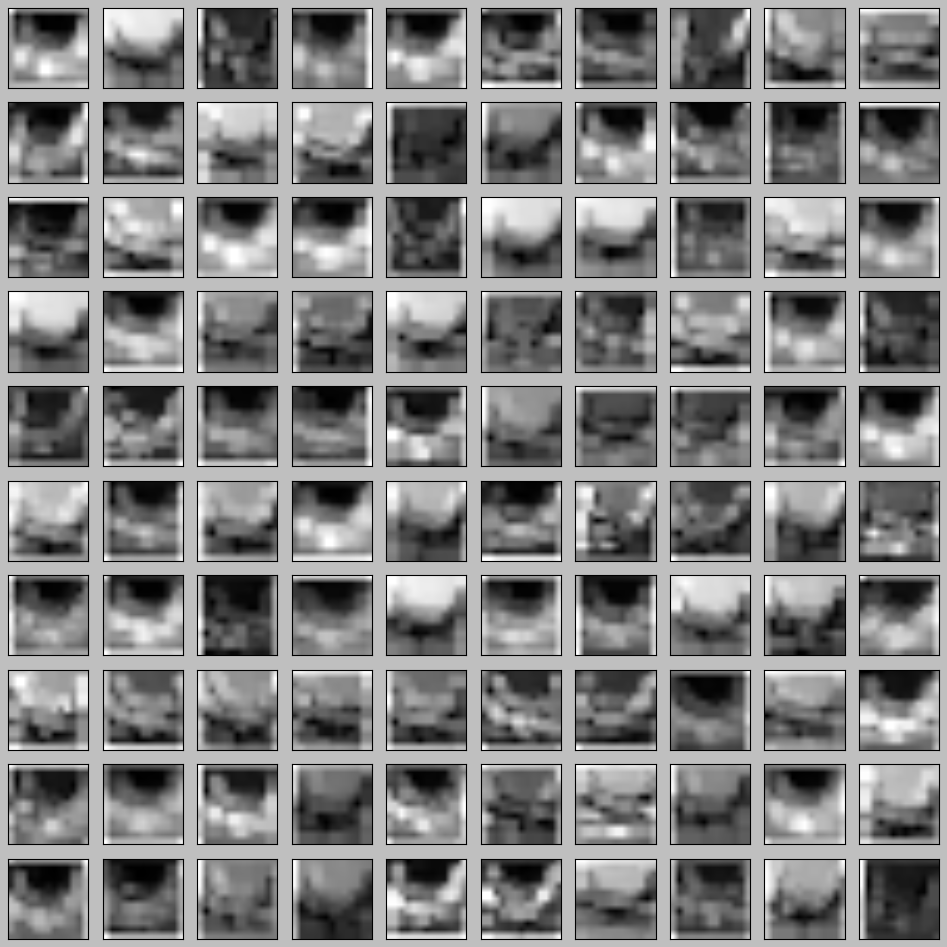

In [163]:
fig=plt.figure(figsize=(12,12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

#### Three consecutive convolution layers

In [186]:
print(model.layers[8],'\n', model.layers[9])
wts = model.layers[9].get_weights()
wts[0].shape

(3, 3, 256, 384)

In [187]:
# Convolution Layer 3
inp = tf.constant(res)
ftr = tf.constant(wts[0])
b   = tf.constant(wts[1])
c = tf.pad(inp, paddings = [[0,0],[1,1],[1,1],[0,0]], mode='CONSTANT') 
c = tf.nn.conv2d(c, ftr, strides = [1,1,1,1], padding='VALID')
c = c + b

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 13, 13, 384)


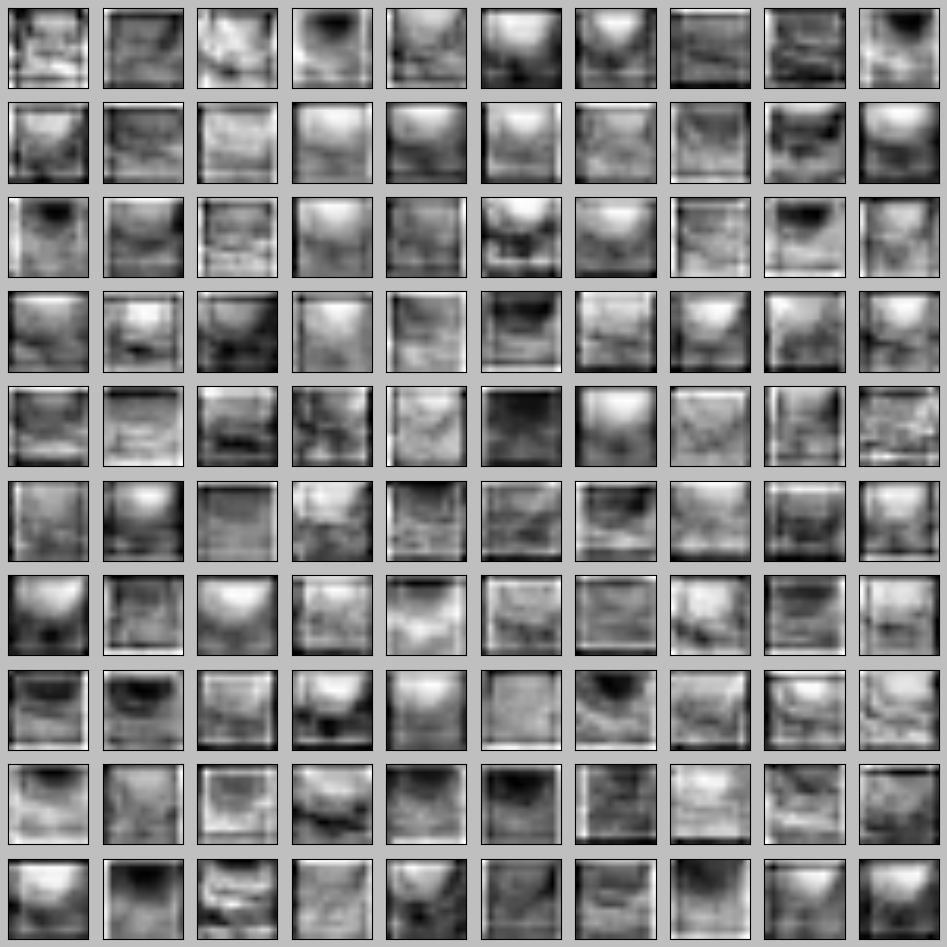

In [166]:
fig=plt.figure(figsize=(12,12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [188]:
print(model.layers[11])
wts = model.layers[11].get_weights()
wts[0].shape

(3, 3, 384, 384)

In [189]:
# Convolution Layer 4
inp = tf.constant(res)
ftr = tf.constant(wts[0])
b   = tf.constant(wts[1])
c = tf.pad(res, paddings = [[0,0],[1,1],[1,1],[0,0]], mode='CONSTANT') 
c = tf.nn.conv2d(c, ftr, strides = [1,1,1,1], padding='VALID')
c = c + b

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 13, 13, 384)


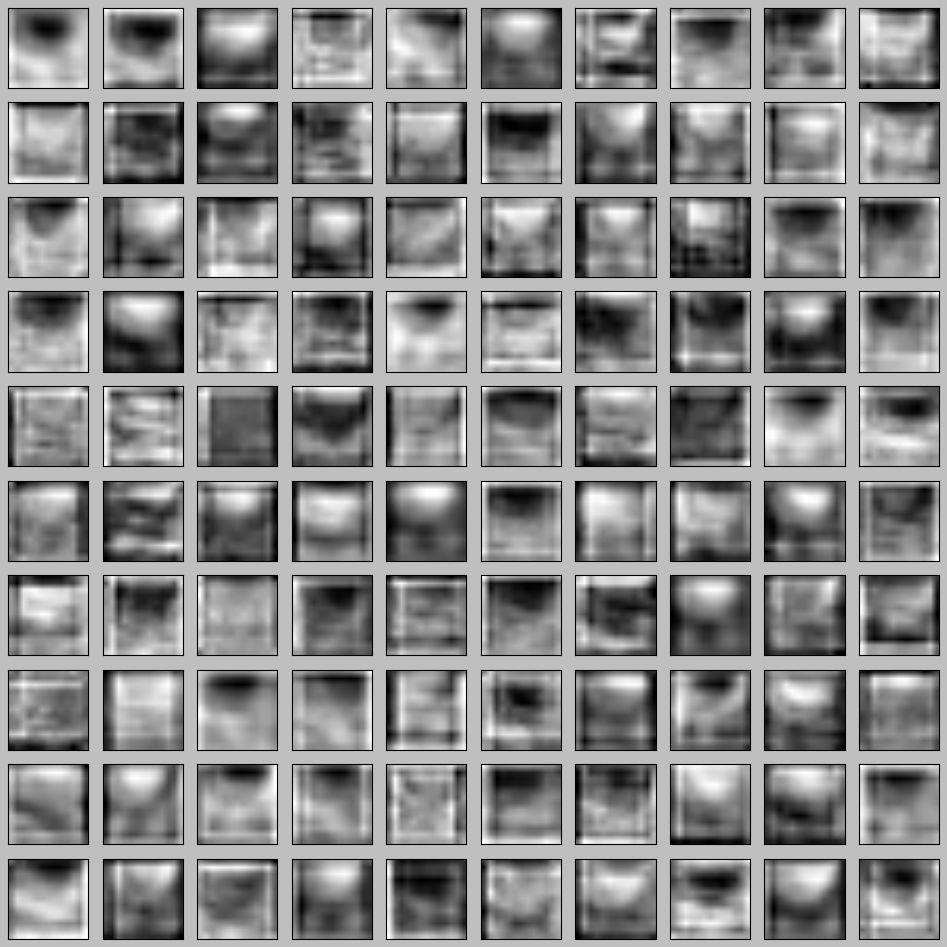

In [169]:
fig=plt.figure(figsize=(12,12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [190]:
print(model.layers[13])
wts = model.layers[13].get_weights()
wts[0].shape

(3, 3, 384, 256)

In [191]:
# Convolution Layer 5
inp = tf.constant(res)
ftr = tf.constant(wts[0])
b   = tf.constant(wts[1])
c = tf.pad(res, paddings = [[0,0],[1,1],[1,1],[0,0]], mode='CONSTANT') 
c = tf.nn.conv2d(c, ftr, strides = [1,1,1,1], padding='VALID')
c = c + b

sess = tf.Session()
res = sess.run(c)
print(res.shape)
sess.close()

(1, 13, 13, 256)


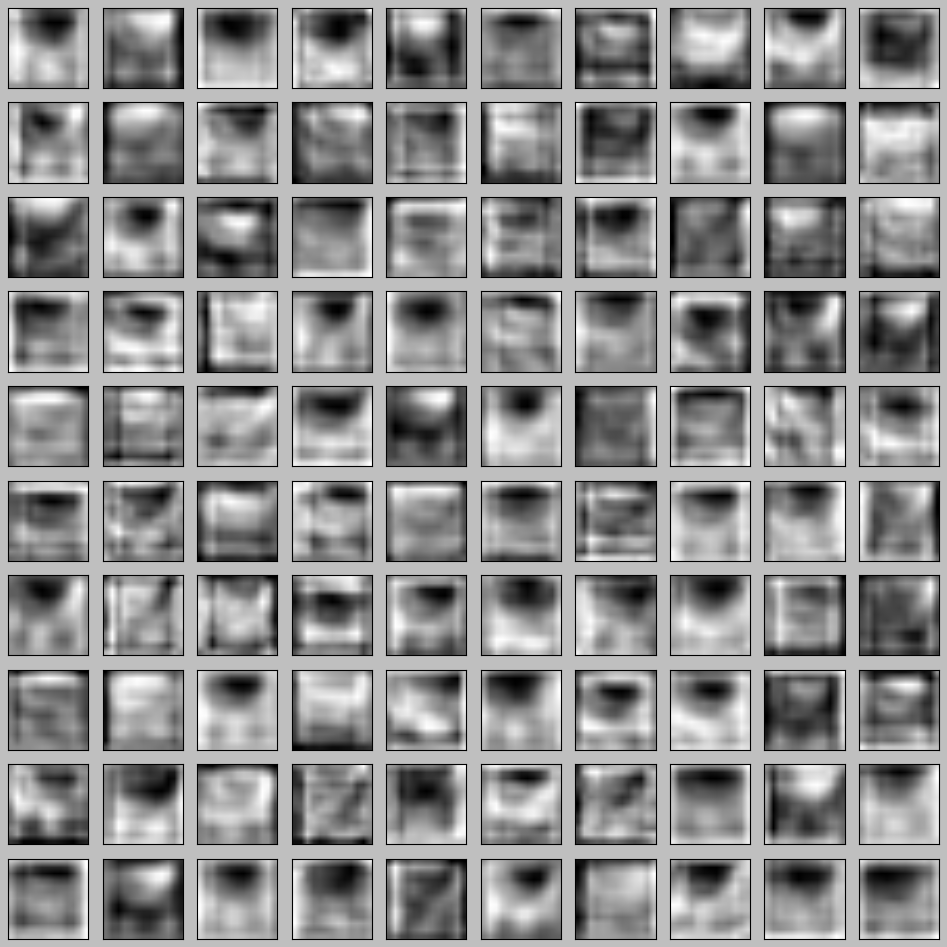

In [192]:
fig=plt.figure(figsize=(12,12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    img = res[0,:,:,i]
    plt.imshow(img, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()